<a href="https://colab.research.google.com/github/abdelrahmanEmad5005/ML_Models/blob/main/Linear_Regression%2C_Lasso%2C_Ridge_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries & Data

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

In [26]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/autompg-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'autompg-dataset' dataset.
Path to dataset files: /kaggle/input/autompg-dataset


In [27]:
csv_path = os.path.join(path, "auto-mpg.csv")

mpg_df = pd.read_csv(csv_path)
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


# Explore Data

In [28]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [29]:
mpg_df[mpg_df['horsepower'].str.isnumeric()==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [30]:
mpg_df["horsepower"] = mpg_df["horsepower"].replace("?", pd.NA)

In [31]:
mpg_df["horsepower"] = pd.to_numeric(mpg_df["horsepower"])

In [35]:
mpg_df = mpg_df.apply(lambda col: col.fillna(col.median()) if col.dtype != "object" else col)

In [36]:
mpg_df=mpg_df.drop('car name',axis=1)

In [38]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


# Define Inputs & Output

In [39]:
X = mpg_df.drop('mpg', axis=1)
y = mpg_df[['mpg']]

# Show Skew & outliers

/tmp/ipython-input-2000531984.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[i])
/tmp/ipython-input-2000531984.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[i])
/tmp/ipython-input-2000531984.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0

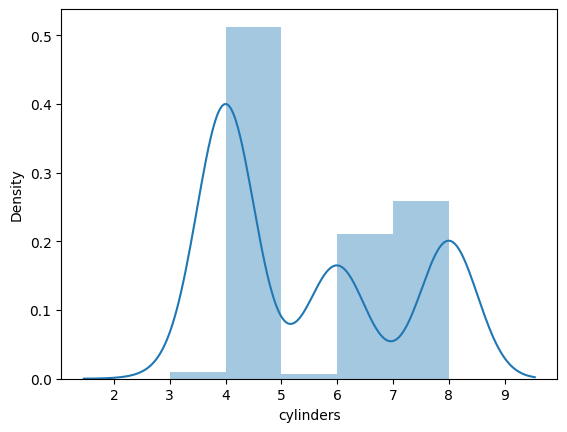

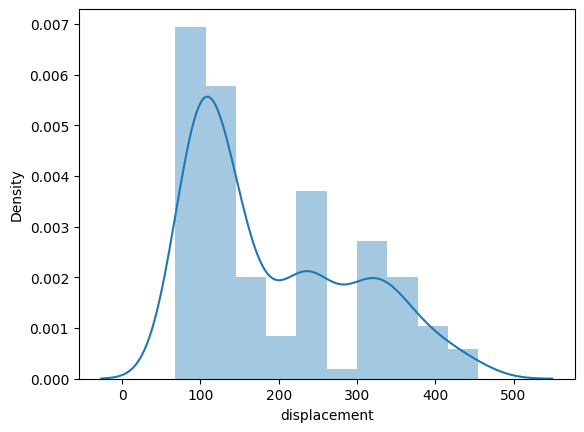

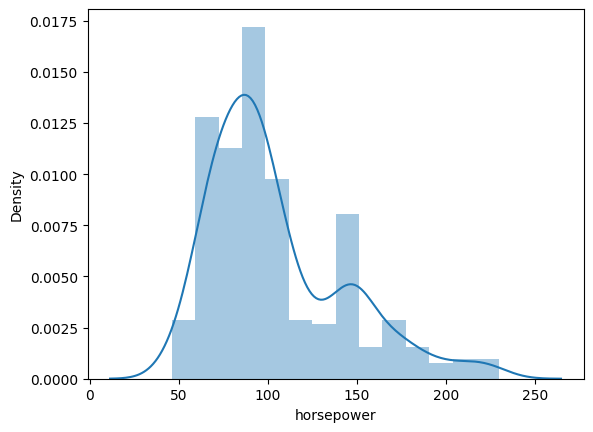

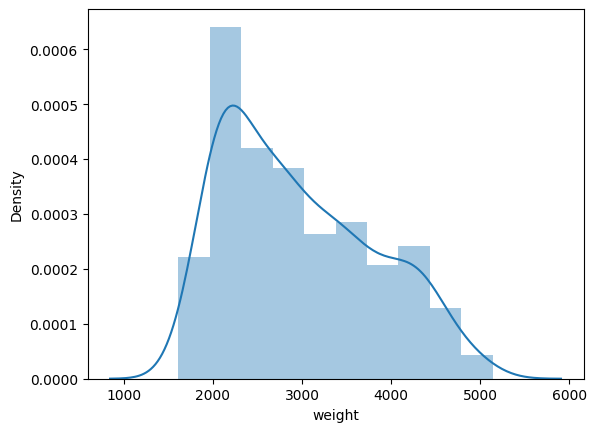

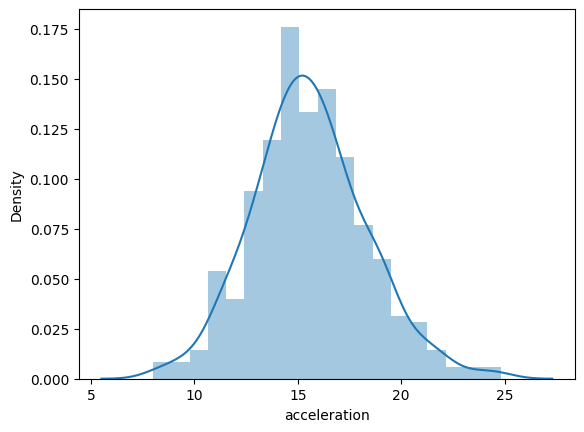

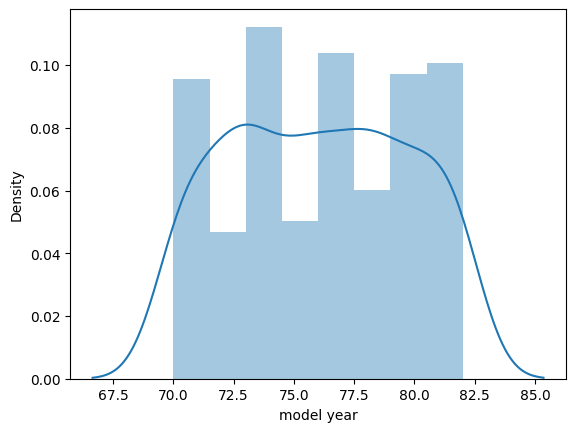

In [40]:
for i in ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']:
    plt.figure()
    sns.distplot(X[i])

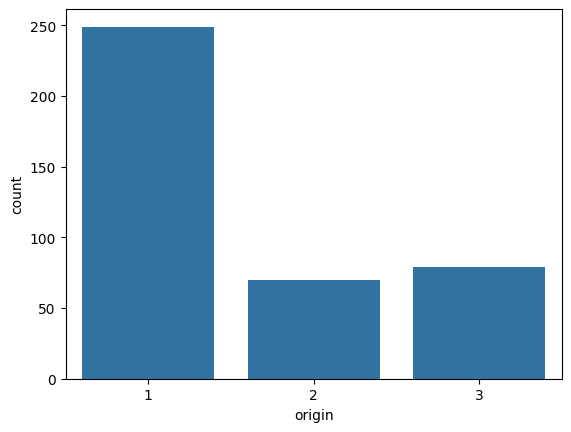

In [43]:
plt.figure()
sns.countplot(x='origin', data=X)
plt.show()

/tmp/ipython-input-860429809.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y['mpg'])


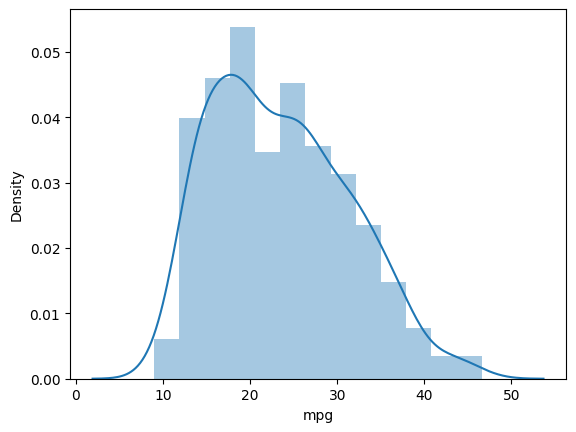

In [46]:
plt.figure()
sns.distplot(y['mpg'])
plt.show()

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y_scaled = pd.DataFrame(scaler.fit_transform(y), columns=y.columns)

#Train Test Split

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=1)

#Linear Regression

In [51]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
print("-----------------------------------------------------------")
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The coefficient for cylinders is -0.08561436895562706
The coefficient for displacement is 0.3044182253593021
The coefficient for horsepower is -0.09718466302484209
The coefficient for weight is -0.7628632829136761
The coefficient for acceleration is 0.021591275172924747
The coefficient for model year is 0.3749408074118709
The coefficient for origin is 0.12302637024556841
-----------------------------------------------------------
The intercept for our model is 0.012833128293992874


In [55]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.8081802739111359
0.8472274567567306


#Ridge

In [58]:
ridge = Ridge(alpha=0.3)
ridge.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {ridge.coef_[idx]}")
print("-----------------------------------------------------------")
print(f"The intercept for our model is {ridge.intercept_[0]}")


The coefficient for cylinders is -0.08073001909555927
The coefficient for displacement is 0.28822207417231654
The coefficient for horsepower is -0.09985675156606108
The coefficient for weight is -0.7510550916024499
The coefficient for acceleration is 0.019127698314832926
The coefficient for model year is 0.37378312489584287
The coefficient for origin is 0.1221271728580029
-----------------------------------------------------------
The intercept for our model is 0.012852163097037066


In [59]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8081651504849107
0.8475401122140553


#Lasso

In [62]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {lasso.coef_[idx]}")
print("-----------------------------------------------------------")
print(f"The intercept for our model is {lasso.intercept_[0]}")


The coefficient for cylinders is -0.0
The coefficient for displacement is -0.0
The coefficient for horsepower is -0.013280002937314536
The coefficient for weight is -0.6205207866794482
The coefficient for acceleration is 0.0
The coefficient for model year is 0.29198732924913484
The coefficient for origin is 0.021567653979880638
-----------------------------------------------------------
The intercept for our model is 0.010364443553173942


In [63]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7853770917055521
0.8277658025171161


### Accuracy of linear and ridge are more or less same because both coefficients values are similar.
### the performance of lasso slightly gone down but this model used only 5 dimensions while other two used 8 dimensions. This model is feasible compared to other two because dimensions are reduced.
### Lasso is also used for feature selection and dimensionality reduction technique



#polynomial features to understand ridge and lasso better

In [64]:
from sklearn.preprocessing import PolynomialFeatures

In [65]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

In [66]:
X_poly = poly.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(278, 29)

## Simple Linear Model

In [67]:
regression_model.fit(X_train, y_train)
print(regression_model.coef_[0])

[-3.46148973e-13  6.50937571e-01 -2.17855687e-01 -2.45601437e+00
 -4.81187049e+00 -6.44775739e-01  2.85471189e+00  1.03974036e+00
 -4.73859713e-01 -6.74188889e-01  1.43519865e+00  1.13264258e+00
 -1.54521285e+00  9.04315573e-01 -1.42332439e-01  1.31740727e+00
 -1.25529739e+00  3.45224055e+00  1.32798427e+00  2.56954964e-01
 -9.14623227e-01 -1.37168588e+00  8.80133118e-01  6.59590958e-01
 -6.92229746e-01 -1.01303860e+00  5.50296551e-01  1.24973189e+00
  9.07830046e-01]


In [71]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.8925011833410883
0.8602464955563419


## Ridge

In [68]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [ 0.          0.64813084 -0.36554878 -2.46919357 -4.70667241 -0.63510083
  2.8499319   0.96173248 -0.49248204 -0.57492325  1.37951065  1.0927984
 -1.42036657  0.89110432 -0.16927823  1.35119104 -1.1349459   3.21038276
  1.16514278  0.22836119 -0.89663938 -1.35284633  0.79573939  0.58576253
 -0.61776911 -0.88637153  0.54014514  1.23036832  0.88256903]


In [70]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8924614223751737
0.861502546945558


## Lasso

In [72]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.          0.2994648  -0.08787231 -2.43642026 -4.7023043  -0.41557099
  2.82883219  0.79630585 -0.63845609 -0.19106524  1.35870323  0.71048483
 -0.95232354  0.80157019 -0.          1.30713909 -0.22245995  2.23244448
  0.41856317  0.         -0.68238432 -1.20299711  0.33414503  0.06086321
 -0.38005578 -0.07856802  0.52335532  1.11608276  0.72523195]


In [73]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.8910435407965047
0.8679233223131172


### Lasso making many coeficients to zero. As mentioned above these are not used for model building.
### Lasso is getting 86% accuracy with nearly half the number of dimensions.